In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os, sys
import re

sys.path.append('../scripts') 
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def load_and_explore_data(file_path):
    """Load the dataset and perform initial exploration"""
    print(" LOADING AND EXPLORING DATA")
    print("=" * 50)
    
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Basic information
    print(f"Dataset Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print("\nFirst 5 rows:")
    print(df.head())
    
    print("\nDataset Info:")
    print(df.info())
    
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    print("\nBasic Statistics:")
    print(df.describe(include='all'))
    
    return df

df = load_and_explore_data('../data/complaints.csv')
print(f"Dataset Shape: {df.shape}")

 LOADING AND EXPLORING DATA


C:\Users\User\AppData\Local\Temp\ipykernel_15720\2056464112.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset Shape: (9609797, 18)
Columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']

First 5 rows:
  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed

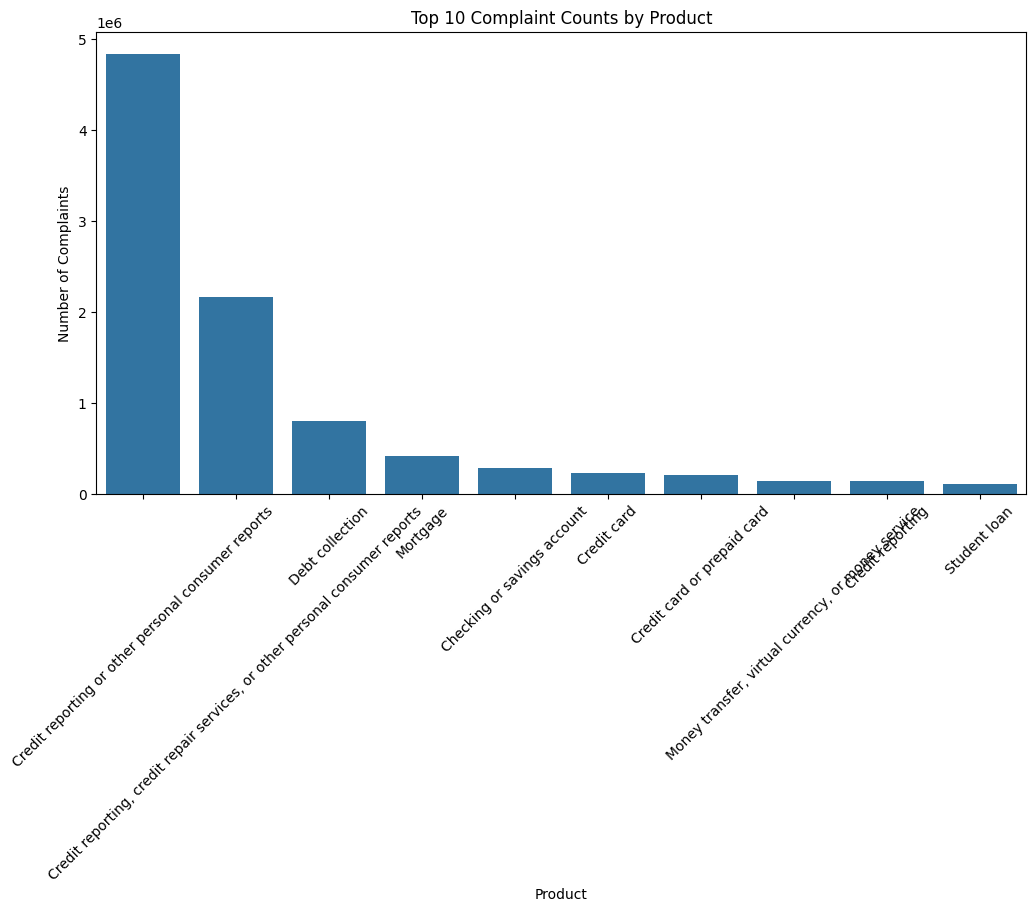

In [3]:
# Distribution of complaints by Product
plt.figure(figsize=(12,6))
product_counts = df['Product'].value_counts()
sns.barplot(x=product_counts.index[:10], y=product_counts.values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Complaint Counts by Products")
plt.ylabel("Number of Complaints")
plt.show()


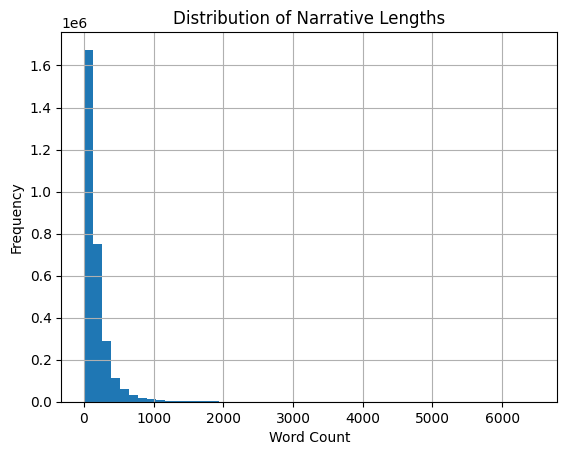

Shortest narrative length: 1.0
Longest narrative length: 6469.0


In [4]:
# Narrative length analysis
df['narrative_length'] = df['Consumer complaint narrative'].dropna().apply(lambda x: len(str(x).split()))
df['narrative_length'].hist(bins=50)
plt.title("Distribution of Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

print("Shortest narrative length:", df['narrative_length'].min())
print("Longest narrative length:", df['narrative_length'].max())


In [5]:
# Complaints with and without narratives
with_narrative = df['Consumer complaint narrative'].notnull().sum()
without_narrative = df['Consumer complaint narrative'].isnull().sum()

print(f"Complaints with narrative: {with_narrative}")
print(f"Complaints without narrative: {without_narrative}")


Complaints with narrative: 2980756
Complaints without narrative: 6629041


In [6]:
# Filter by 5 target products & remove null narratives
target_products = [
    'Credit card',
    'Personal loan',
    'Buy Now, Pay Later (BNPL)',
    'Savings account',
    'Money transfer, virtual currency'
]

filtered_df = df[
    df['Product'].isin(target_products) &
    df['Consumer complaint narrative'].notnull()
].copy()

print(f"Filtered dataset size: {filtered_df.shape}")


Filtered dataset size: (80667, 19)


In [7]:
# Clean text narratives
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'i am writing.*?complaint', '', text)  # remove boilerplate text if present
    text = re.sub(r'\s+', ' ', text).strip()
    return text

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)


In [8]:
# Save cleaned dataset back to Drive
output_path = '../data/filtered_complaints.csv'
filtered_df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")


Cleaned dataset saved to: ../data/filtered_complaints.csv
